# Coding Practice Session 4
## Text, Labels, and Annotations

In [149]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from datetime import datetime, timedelta

### Adding Titles and Labels

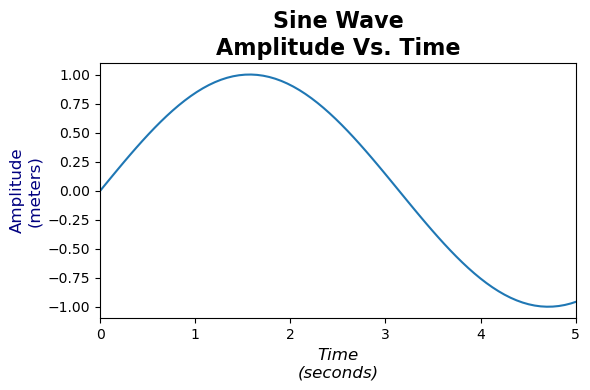

In [ ]:
# data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# figure and axes objects
fig, ax = plt.subplots(figsize=(6, 4))

# plot data
ax.plot(x, y)

# add title and axis labels
ax.set_title("Sine Wave\nAmplitude Vs. Time", fontsize=16, fontweight="bold")
ax.set_xlabel("Time\n(seconds)", fontsize=12, fontstyle="italic")
ax.set_ylabel("Amplitude\n(meters)", fontsize=12, color="navy")
ax.set_xlim(0, 5)

fig.tight_layout()
plt.show()

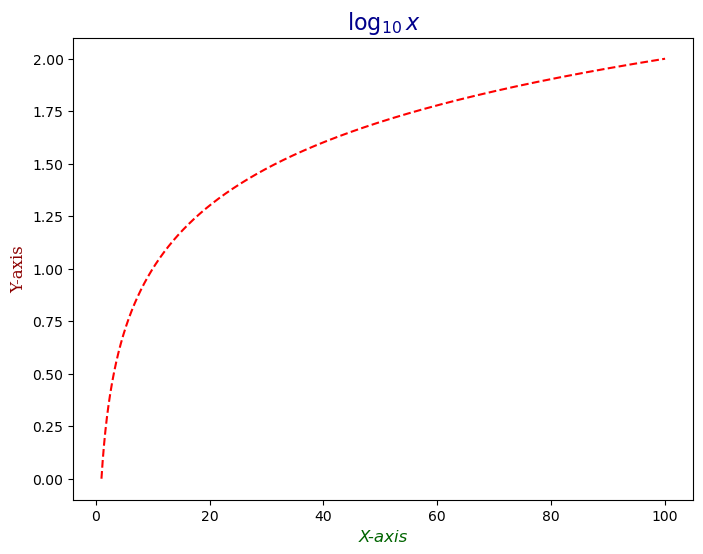

In [39]:
x = np.linspace(1, 100, 10000)
y = np.log10(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, "r--")
ax.set_title("$\log_{10}{x}$", fontsize=16, fontweight="bold", color="darkblue")
ax.set_xlabel("X-axis", fontsize=12, fontstyle="italic", color="darkgreen")
ax.set_ylabel("Y-axis", fontsize=12, fontfamily="serif", color="darkred")

plt.show()

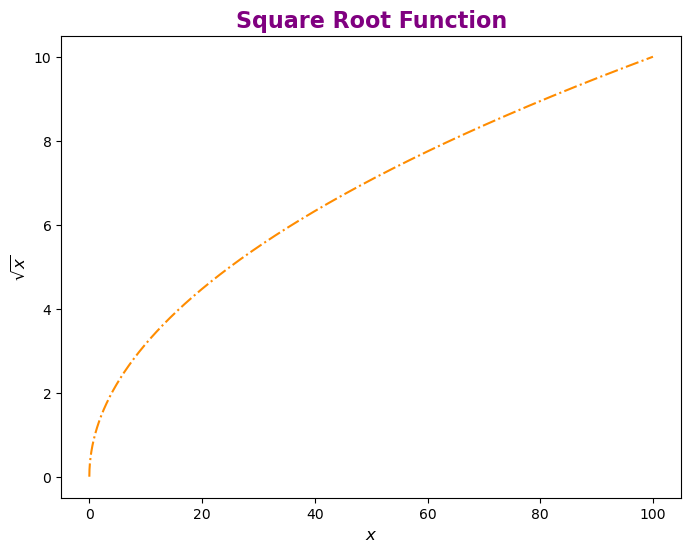

In [ ]:
x = np.linspace(0, 100, 10_000)
y = np.sqrt(x)

title_props = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "purple",
}

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, color="darkorange", linestyle="-.")

ax.set_title("Square Root Function", **title_props)
ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$\sqrt{x}$", fontsize=12)

plt.show()

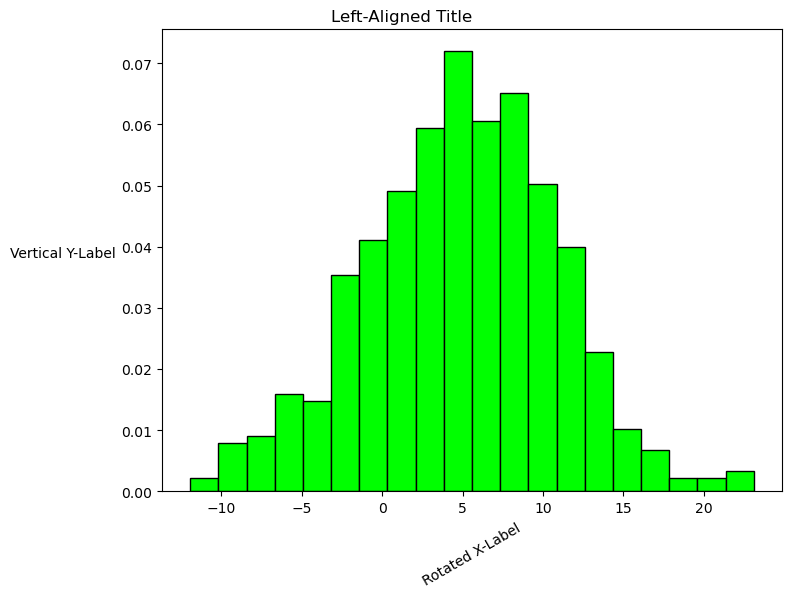

In [79]:
y = np.random.normal(loc=5, scale=6, size=500)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(y, bins=20, edgecolor="black", facecolor="lime", density=True)

ax.set_title("Left-Aligned Title", ha="right")
ax.set_xlabel("Rotated X-Label", rotation=30)
ax.set_ylabel("Vertical Y-Label", rotation=0, ha="right")

plt.show()

### Annotations and Text Boxes

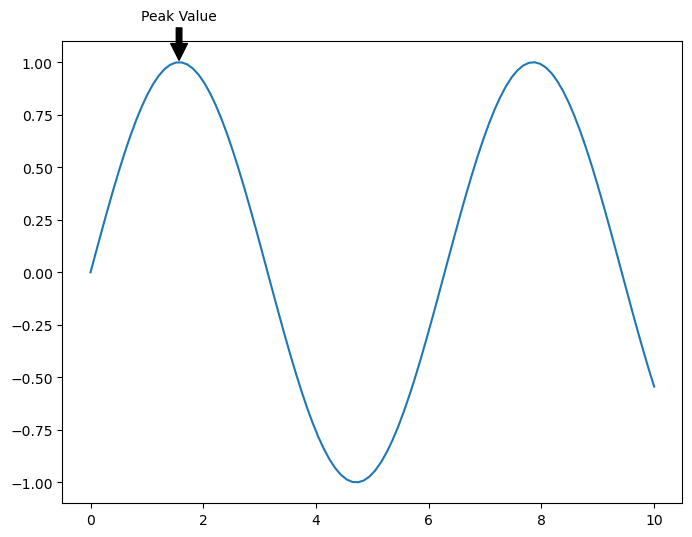

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)

ax.annotate(
    "Peak Value",
    xy=(np.pi / 2, 1),
    xytext=(np.pi / 2, 1.2),
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
)


plt.show()

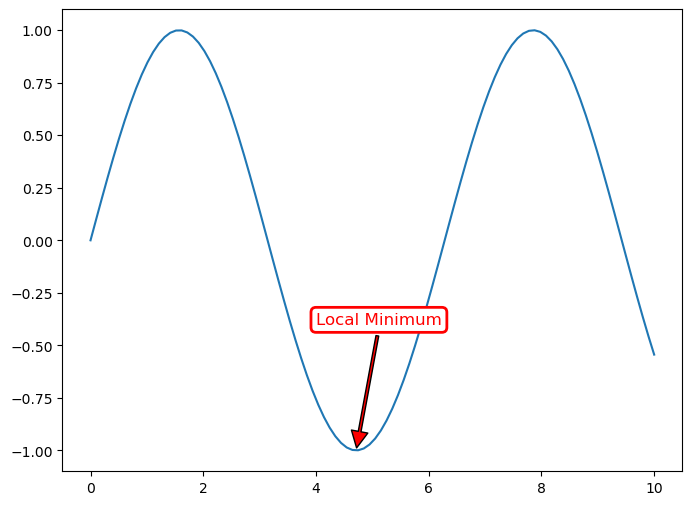

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)

ax.annotate(
    "Local Minimum",
    xy=(3 * np.pi / 2, -1),
    xytext=(4, -0.4),
    arrowprops=dict(facecolor="r", shrink=0.02, width=2),
    fontsize=12,
    color="r",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="r", lw=2),
)

plt.show()

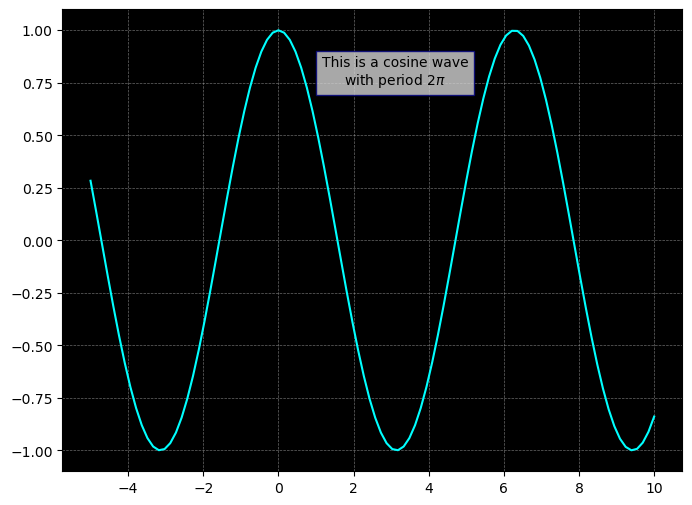

In [ ]:
x = np.linspace(-5, 10, num=100)
y = np.cos(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor("black")
ax.plot(x, y, c="cyan")

ax.text(
    3.1,
    0.8,
    "This is a cosine wave\nwith period $2\pi$",
    ha="center",
    va="center",
    bbox=dict(facecolor="lightgrey", ec="navy", alpha=0.8),
)

ax.grid(True, linestyle="--", alpha=0.6, lw=0.5)
plt.show()

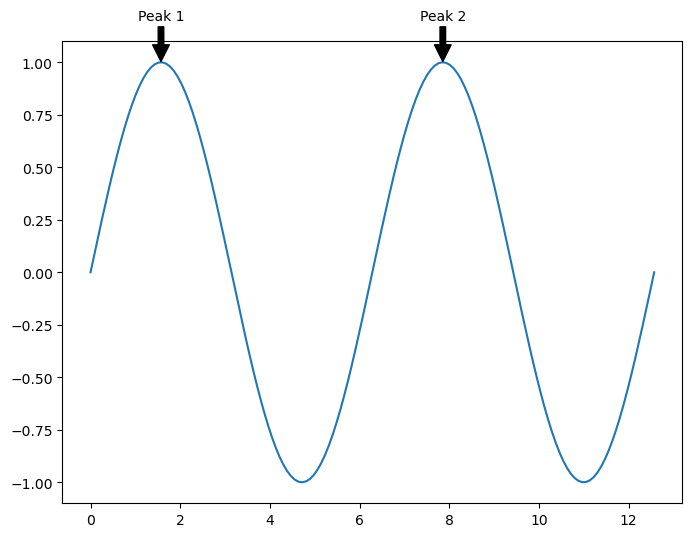

In [ ]:
x = np.linspace(0, 4 * np.pi, num=150)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)

peaks = [(np.pi / 2, 1), (5 * np.pi / 2, 1)]  # cords of peak points

for i, (xi, yi) in enumerate(peaks, start=1):
    ax.annotate(
        f"Peak {i}",
        xy=(xi, yi),
        xytext=(xi, yi + 0.2),
        arrowprops=dict(fc="black", shrink=0.02),
        ha="center",
    )


plt.show()

### Customizing Tick Labels

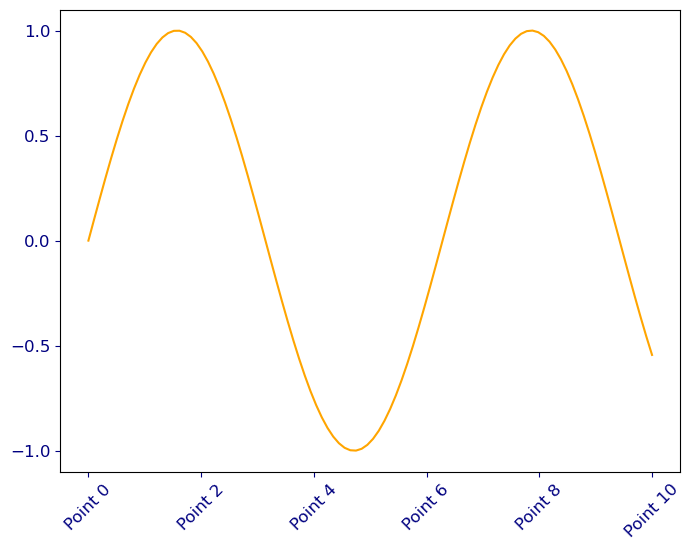

In [144]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, "orange")

ax.set_xticks(np.arange(0, 11, 2))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_xticklabels((f"Point {i}" for i in range(0, 11, 2)), rotation=45, ha="center")

ax.tick_params(axis="both", which="major", labelsize=12, colors="navy")

plt.show()

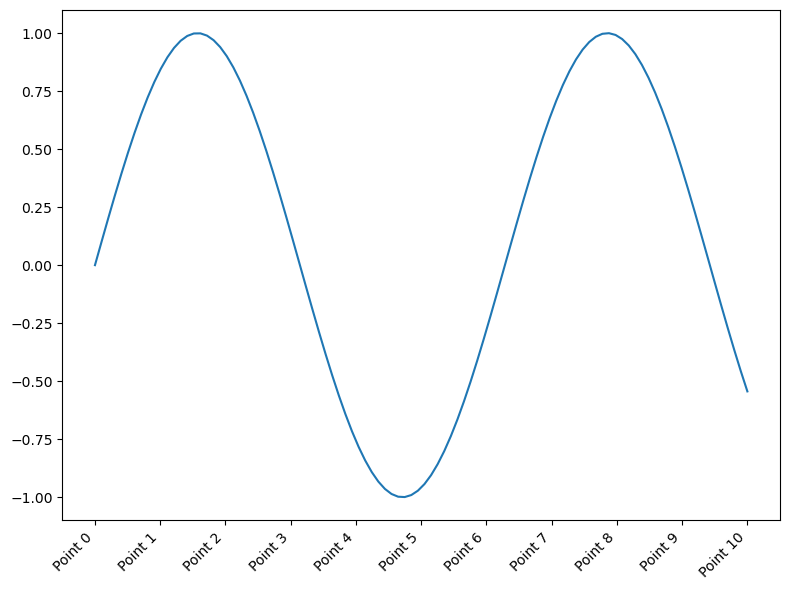

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)

ax.set_xticks(np.arange(0, 11, 1))
ax.set_xticklabels(
    (f"Point {i}" for i in range(0, 11)), rotation=45, ha="right", size=10
)

fig.tight_layout()
plt.show()

### Date Formatting

In [184]:
start_date = datetime(year=2025, month=1, day=1)
dates = np.array([start_date + timedelta(days=i) for i in range(180)])
profits = np.abs(np.random.randn(180).cumsum())

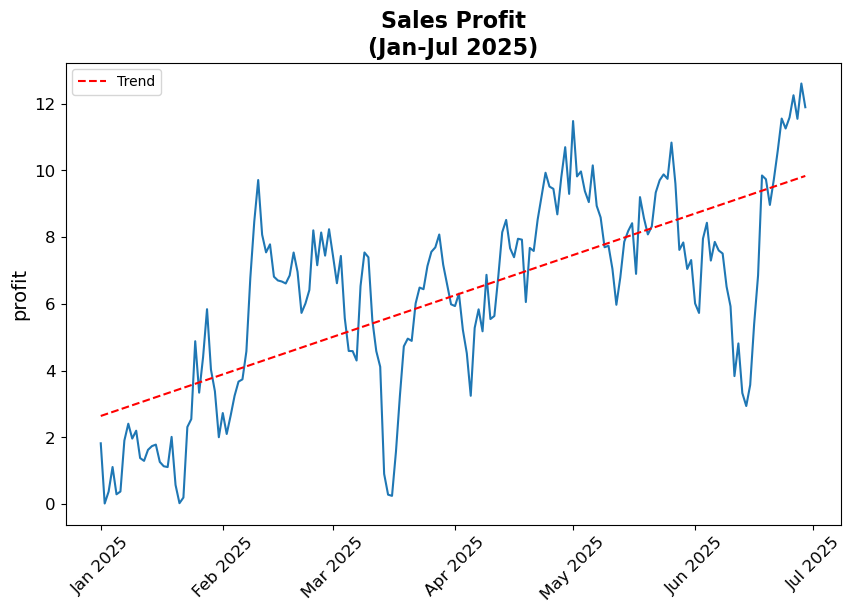

In [208]:
# figure, axes objects
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dates, profits)

# set title, Y label
ax.set_title("Sales Profit\n(Jan-Jul 2025)", fontweight="bold", size=16)
ax.set_ylabel("profit", size=14)

# set X-axis ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

ax.tick_params(axis="x", rotation=45, labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# convert dates to numbers to use for polyfit
dates_num = mdates.date2num(dates)

# add trend line
z = np.polyfit(dates_num, profits, deg=1)
p = np.poly1d(z)
ax.plot(dates, p(dates_num), "r--", label="Trend")

ax.legend(loc="upper left")
plt.show()